In [236]:
import pandas as pd
import numpy as np

## Passo 1: Leitura dos dados
Leitura dos bancos de dados em DataFrame Pandas. 

In [237]:
caminho_dados_lazaro = 'Datasets/Lazaro/dados_lazaro.csv'

In [238]:
df = pd.read_csv(caminho_dados_lazaro)

In [239]:
df.head()

,Piquete,Altura real,Altura esperada,Animal,SensorID,Sensor Name,Date,X,Y,Z,Comportamento,Season
0,11,25.2,25.0,85,434138,Accelerometer - 434138,2019-11-09 08:25:30,-0.012,-0.456,0.900,Indefinido,Indefinido
1,11,25.2,25.0,85,434138,Accelerometer - 434138,2019-11-09 08:25:32,-0.008,-0.456,0.892,Indefinido,Indefinido
2,11,25.2,25.0,85,434138,Accelerometer - 434138,2019-11-09 08:25:33,-0.010,-0.460,0.897,Indefinido,Indefinido
3,11,25.2,25.0,85,434138,Accelerometer - 434138,2019-11-09 08:25:33,0.021,-0.386,0.963,Indefinido,Indefinido
4,11,25.2,25.0,85,434138,Accelerometer - 434138,2019-11-09 08:25:34,0.012,-0.423,0.910,Indefinido,Indefinido


## Passo 2: Pré-processamento


In [240]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Função para calcular acuracia de cada etapa do Pré-processamento
def calc_acuracia(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print("Acurácia da etapa nos dados de teste:", end=" ")
    print(accuracy_score(y_test, preds)*100)
    preds = model.predict(X_train)
    print("Acurácia da etapa nos dados de treino:", end=" ")
    print(accuracy_score(y_train, preds)*100)

### 2.1 Lidando com dados faltantes

In [241]:
df[df.isnull().any(axis=1)]

,Piquete,Altura real,Altura esperada,Animal,SensorID,Sensor Name,Date,X,Y,Z,Comportamento,Season
296,11,25.2,25.0,90,434137,Accelerometer - 434137,2019-11-09 08:36:31,175786.0,NaN,NaN,Indefinido,Indefinido


In [242]:
df.isnull().sum()

Piquete            0
Altura real        0
Altura esperada    0
Animal             0
SensorID           0
Sensor Name        0
Date               0
X                  0
Y                  1
Z                  1
Comportamento      0
Season             0
dtype: int64

In [243]:
# No entanto, durante a integração dos dados valores nulos em "Comportamento" e "Season" foram nomeados "Indefinido", logo temos que tratá-los
df.Comportamento.value_counts()

Pastejando     342516
Ruminando      158228
Ocio           126141
Indefinido      23496
Outros          19472
Locomovendo     12567
Agua             3779
Outro            2303
Ócio             2064
Name: Comportamento, dtype: int64

In [244]:
df = df.replace('Indefinido', np.NaN)

In [245]:
# Como praticamente não há valores faltantes nas variáveis independentes e há obeservações com variáveis alvo nulas, o melhor é apenas eliminar linhas com valores nulos
df = df.dropna(axis=0)
df.isnull().sum()

Piquete            0
Altura real        0
Altura esperada    0
Animal             0
SensorID           0
Sensor Name        0
Date               0
X                  0
Y                  0
Z                  0
Comportamento      0
Season             0
dtype: int64

### 2.2 Tratamento de dados categóricos

#### Correção dos nomes das classificações

In [246]:
np.unique(df['Comportamento'])

array(['Agua', 'Locomovendo', 'Ocio', 'Outro', 'Outros', 'Pastejando',
       'Ruminando', 'Ócio'], dtype=object)

In [247]:
df = df.replace(to_replace=['Ócio','Outro'], value=['Ocio', 'Outros'])

In [248]:
np.unique(df['Season'])

array(['Spring', 'fall', 'spring', 'spring ', 'summer'], dtype=object)

In [249]:
df = df.replace(to_replace=['Spring','spring '], value=['spring', 'spring'])

In [250]:
# Devido a baixa quantidade de dados desses comportamentos em relação ao de mais, suas obseravações são deletadas

df = df.replace(['Agua', 'Locomovendo', 'Outros'], np.NaN)
df = df.dropna(axis=0)

In [251]:
df.Comportamento.value_counts()

Pastejando    342516
Ruminando     158228
Ocio          128205
Name: Comportamento, dtype: int64

#### Codificação - Usando One-Hot Encoding

In [252]:
from sklearn.preprocessing import OneHotEncoder

# Aplica one-hot encoder à coluna Season
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df['Season'].values.reshape(-1,1)))

In [253]:
# One-hot encoder remove os indices; recuperando-os
OH_cols.index = df.index

In [254]:
# Renomeia as colunas com suas respectivas definições
OH_cols.columns = OH_encoder.get_feature_names(['Season'])

In [255]:
# Remoção da coluna Season (será substituida com one-hot encoding)
num_df = df.drop('Season', axis=1)

In [256]:
# Adiciona colunas codificadas por one-hot a features numéricas
OH_df = pd.concat([num_df, OH_cols], axis=1)

In [257]:
# Como one-hot encoder foi melhor, usaremos ele
df = OH_df

In [258]:
OH_df

,Piquete,Altura real,Altura esperada,Animal,SensorID,Sensor Name,Date,X,Y,Z,Comportamento,Season_fall,Season_spring,Season_summer
2846,11,25.2,25.0,85,434138,Accelerometer - 434138,2019-11-09 09:47:47,-0.132,-0.583,0.712,Ocio,0.0,1.0,0.0
2847,11,25.2,25.0,85,434138,Accelerometer - 434138,2019-11-09 09:47:48,0.021,-0.792,0.574,Ocio,0.0,1.0,0.0
2848,11,25.2,25.0,85,434138,Accelerometer - 434138,2019-11-09 09:47:50,0.021,-0.792,0.574,Ocio,0.0,1.0,0.0
2849,11,25.2,25.0,85,434138,Accelerometer - 434138,2019-11-09 09:47:51,0.021,-0.792,0.574,Ocio,0.0,1.0,0.0
2850,11,25.2,25.0,85,434138,Accelerometer - 434138,2019-11-09 09:47:52,-0.061,-0.870,0.478,Ocio,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690561,1,10.3,10.0,81,434137,Accelerometer - 434137,2020-06-30 17:43:27,-0.729,0.026,0.660,Pastejando,1.0,0.0,0.0
690562,1,10.3,10.0,81,434137,Accelerometer - 434137,2020-06-30 17:43:28,-0.614,0.271,0.577,Pastejando,1.0,0.0,0.0
690563,1,10.3,10.0,81,434137,Accelerometer - 434137,2020-06-30 17:43:29,-0.734,0.227,0.571,Pastejando,1.0,0.0,0.0
690564,1,10.3,10.0,81,434137,Accelerometer - 434137,2020-06-30 17:43:30,-0.587,-0.149,0.704,Pastejando,1.0,0.0,0.0


### 2.3 Tratamento de outliers

#### Estatística básica dos dados

In [259]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid", palette="rainbow")
%matplotlib inline

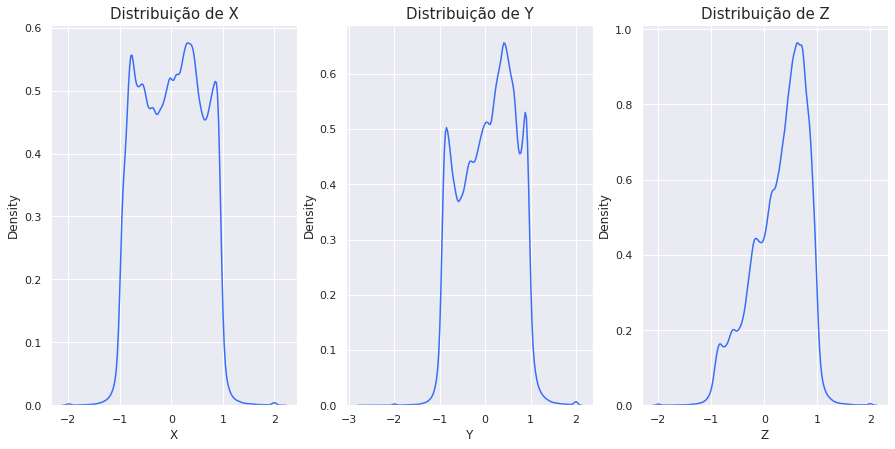

In [260]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("Distribuição de X", fontsize=15)
sns.kdeplot(data = df["X"])
plt.subplot(1,3,2)
plt.title("Distribuição de Y", fontsize=15)
sns.kdeplot(data = df["Y"])
plt.subplot(1,3,3)
plt.title("Distribuição de Z", fontsize=15)
sns.kdeplot(data = df["Z"])
plt.show()

#### Usando especificações do sensor

In [261]:
df.describe()

,Piquete,Altura real,Altura esperada,Animal,SensorID,X,Y,Z,Season_fall,Season_spring,Season_summer
count,628949.000000,628949.000000,628949.000000,628949.000000,628949.000000,628949.000000,628949.000000,628949.000000,628949.000000,628949.000000,628949.000000
mean,7.668875,18.993407,19.145784,75.535546,432876.812495,0.003104,0.071496,0.301034,0.398161,0.240705,0.361134
std,3.777652,5.947000,6.288472,26.852944,18001.109180,0.576456,0.582189,0.494047,0.489519,0.427512,0.480330
min,1.000000,10.000000,10.000000,21.000000,175810.000000,-1.999000,-2.688000,-1.999000,0.000000,0.000000,0.000000
25%,4.000000,11.230000,11.560000,81.000000,434136.000000,-0.498000,-0.402000,-0.021000,0.000000,0.000000,0.000000
50%,9.000000,20.600000,20.000000,84.000000,434137.000000,0.020000,0.127000,0.407000,0.000000,0.000000,0.000000
75%,11.000000,24.620000,25.000000,93.000000,434139.000000,0.475000,0.540000,0.683000,1.000000,0.000000,1.000000
max,12.000000,26.200000,25.000000,105.000000,434139.000000,2.106000,2.000000,2.020000,1.000000,1.000000,1.000000


In [262]:
# Range mínimo e máximo do aceleromêtro
min = float(-1.999)
max = float(1.999)

In [263]:
df.loc[df.X > max, 'X'] = max
df.loc[df.Y > max, 'Y'] = max
df.loc[df.Z > max, 'Z'] = max

df.loc[df.X < min, 'X'] = min
df.loc[df.Y < min, 'Y'] = min
df.loc[df.Z < min, 'Z'] = min

### 2.4 Transformação

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler.fit(X_test)
X_test = scaler.transform(X_test)
calc_acuracia(X_train, X_test, y_train, y_test)

### 2.5 Criação de novas features

#### Magnitude

In [264]:
a = df[['X', 'Y', 'Z']].pow(2)

In [265]:
a = a.sum(axis=1)

In [266]:
magn = a.pow(1/2)
magn = magn.rename('magn')

In [267]:
df = pd.concat([df, magn], axis=1)

#### Signal Magnitude Area

In [268]:
a = df[['X', 'Y', 'Z']].abs()

In [269]:
sma = a.sum(axis=1)
sma = sma.rename('sma')

In [270]:
df = pd.concat([df, sma], axis=1)

#### Entropy

In [271]:
a = df[['X', 'Y', 'Z']]

In [272]:
a = a.sum(axis=1)

In [273]:
a = a + 1

In [274]:
a = a**2

In [275]:
a = a.replace(to_replace=0, value=0.0001) # Pois ln de 0 é indefinido

In [276]:
b = np.log(a)

In [277]:
ent = a*b
ent = ent.rename('ent')

In [278]:
df = pd.concat([df, ent], axis=1)

#### Energy 

In [279]:
a = df[['X', 'Y', 'Z']]

In [280]:
a = a**2

In [281]:
a = a.sum(axis=1)

In [282]:
erg = a**2
erg = erg.rename('erg')

In [283]:
df = pd.concat([df, erg], axis=1)

#### Pitch

In [284]:
a = df[['Y', 'Z']]

In [285]:
a = a**2

In [286]:
a = a.sum(axis=1)

In [287]:
a = a**(1/2)

In [288]:
b = -df.X

In [289]:
a = b/a

In [290]:
a = np.arctan(a)

In [291]:
pit = a*(180/np.pi)

In [292]:
pit = pit.rename('pit')

In [293]:
df = pd.concat([df, pit], axis=1)

#### Roll

In [294]:
a = df[['Y', 'Z']]

In [295]:
rol = np.arctan2(a.Z, a.Y)*(180/np.pi)

In [296]:
rol = rol.rename('rol')

In [297]:
df = pd.concat([df, rol], axis=1)

#### Inclination

In [298]:
a = df[['X', 'Y', 'Z']]

In [299]:
a = ((a.X**2 + a.Y**2)**(1/2))/a.Z

In [300]:
icl = np.arctan(a)*(180/np.pi)

In [301]:
icl = icl.rename('icl')

In [302]:
df = pd.concat([df, icl], axis=1)

### 2.6 Testes com train_size

In [303]:
df.columns

Index(['Piquete', 'Altura real', 'Altura esperada', 'Animal', 'SensorID',
       'Sensor Name', 'Date', 'X', 'Y', 'Z', 'Comportamento', 'Season_fall',
       'Season_spring', 'Season_summer', 'magn', 'sma', 'ent', 'erg', 'pit',
       'rol', 'icl'],
      dtype='object')

In [168]:
X = df[['X', 'Y', 'Z', 'Season_fall', 'Season_spring', 'Season_summer', 'magn',
        'sma', 'ent', 'erg', 'pit', 'rol', 'icl']]
y = df.Comportamento

In [180]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.10, random_state=0)

In [181]:
calc_acuracia(X_train, X_test, y_train, y_test)

Acurácia da etapa nos dados de teste: 70.48007702431742
Acurácia da etapa nos dados de treino: 99.99205011606831


In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.50, random_state=0)

In [183]:
calc_acuracia(X_train, X_test, y_train, y_test)

Acurácia da etapa nos dados de teste: 72.6992606725495
Acurácia da etapa nos dados de treino: 99.98950628668824


In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=0)

In [173]:
calc_acuracia(X_train, X_test, y_train, y_test)

Acurácia da etapa nos dados de teste: 72.99838354930175
Acurácia da etapa nos dados de treino: 99.98682608616647


In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

In [175]:
calc_acuracia(X_train, X_test, y_train, y_test)

Acurácia da etapa nos dados de teste: 73.14389651356542
Acurácia da etapa nos dados de treino: 99.98558439383436


In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=0)

In [177]:
calc_acuracia(X_train, X_test, y_train, y_test)

Acurácia da etapa nos dados de teste: 73.16400349789332
Acurácia da etapa nos dados de treino: 99.98728036266866


In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=0)

In [179]:
calc_acuracia(X_train, X_test, y_train, y_test)

Acurácia da etapa nos dados de teste: 73.34937409240749
Acurácia da etapa nos dados de treino: 99.98578392311347


### 2.7 Seleção de features

In [213]:
X = df[['X', 'Y', 'Z', 'Season_fall', 'Season_spring', 'Season_summer', 'magn',
        'sma', 'ent', 'erg', 'pit', 'rol', 'icl']]
y = df.Comportamento

In [214]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=0)

In [215]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

k_vs_score = []

for k in range(3,14,1):
  selector = SelectKBest(score_func=f_classif, k=k)

  X_train2 = selector.fit_transform(X_train, y_train)
  X_test2 = selector.transform(X_test)

  mdl = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
  mdl.fit(X_train2, y_train)

  preds = mdl.predict(X_test2)

  score = accuracy_score(y_test, preds)
  print("k = {} - Acurácia = {}".format(k, score))

  k_vs_score.append(score)


k = 3 - Acurácia = 0.6435911704693007
k = 4 - Acurácia = 0.6605506532050772
k = 5 - Acurácia = 0.688735193576596
k = 6 - Acurácia = 0.6982643029387604
k = 7 - Acurácia = 0.7060285661287331
k = 8 - Acurácia = 0.7264700426636987
k = 9 - Acurácia = 0.7255372711132311
k = 10 - Acurácia = 0.7258711609295917
k = 11 - Acurácia = 0.7301428306436654
k = 12 - Acurácia = 0.7310862018708429
k = 13 - Acurácia = 0.7299838354930175


<AxesSubplot:>

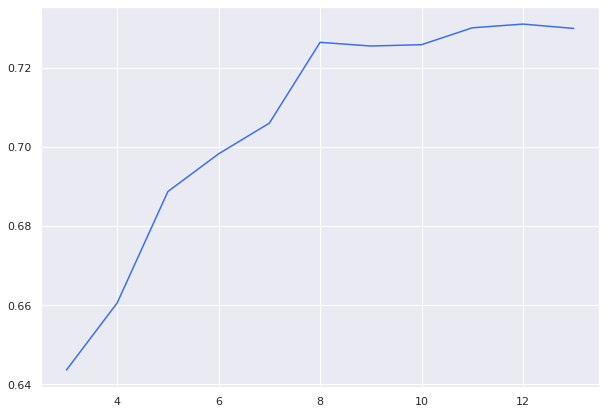

In [217]:
pd.Series(k_vs_score, index=range(3,14,1)).plot(figsize=(10,7))

In [225]:
selector = SelectKBest(score_func=f_classif, k=11)
selector.fit(X_train, y_train)

SelectKBest(k=11)

In [306]:
mask = selector.get_support()
X_test.columns[mask]
# Features mais relevantes

Index(['X', 'Z', 'Season_fall', 'Season_spring', 'Season_summer', 'magn',
       'sma', 'ent', 'pit', 'rol', 'icl'],
      dtype='object')

<AxesSubplot:>

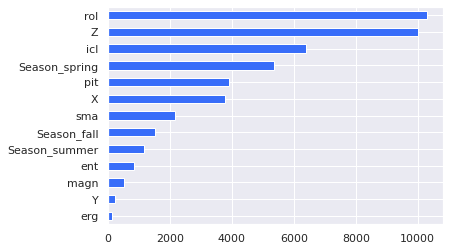

In [228]:
pd.Series(selector.scores_, index=X_train.columns).sort_values().plot.barh()

### 2.8 Gravação do conjunto de dados após o pré-processamento

In [307]:
# Como base na seleção de features e outras condições, serão salvas:
df = df[['Piquete', 'Altura real', 'Altura esperada', 'Animal', 'SensorID',
       'Sensor Name', 'Date', 'X', 'Y', 'Z', 'Comportamento', 'Season_fall',
       'Season_spring', 'Season_summer', 'magn', 'sma', 'ent', 'pit',
       'rol', 'icl']]

In [308]:
# Geração de um zip com os dados em csv 
compression_opts = dict(method='zip', archive_name='dados_pre_processados_lazaro.csv') 

df.to_csv('dados_pre_processados_lazaro_final.zip', index=False, compression=compression_opts)